In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
df_teams = pd.read_excel("/content/Teams.xlsx")
df_atheletes = pd.read_excel("/content/Athletes.xlsx")
df_medals = pd.read_excel("/content/Medals.xlsx")
print(df_teams.info())
print(df_atheletes.info())
print(df_medals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 n

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df_medals.rename(columns={'Team/NOC':'NOC', 'Total': 'Total Medals', 'Gold':'Gold Medals', 'Silver': 'Silver Medals', 'Bronze': 'Bronze Medals'}, inplace=True)
df_disciplines_per_country = df_teams.groupby(by='NOC').agg({'Discipline':'nunique'})
df_atheletes_per_country = df_atheletes.groupby(by='NOC').agg({'Name':'nunique'}).rename(columns={'Name':'Athletes'})
df = pd.merge(left=df_disciplines_per_country, right=df_medals, how='inner',on='NOC')
df = pd.merge(left=df, right=df_atheletes_per_country, how='inner',on='NOC')
df.rename(columns={'NOC':'Country'}, inplace=True)
df = df[['Country', 'Rank', 'Total Medals', 'Gold Medals', 'Silver Medals', 'Bronze Medals', 'Athletes', 'Discipline' ]]
df.sort_values(by='Rank', inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.head(10)

,Country,Rank,Total Medals,Gold Medals,Silver Medals,Bronze Medals,Athletes,Discipline
0,United States of America,1,113,39,41,33,614,18
1,People's Republic of China,2,88,38,32,18,398,17
2,Japan,3,58,27,14,17,585,20
3,Great Britain,4,65,22,21,22,366,10
4,ROC,5,71,20,28,23,318,14
5,Australia,6,46,17,7,22,470,15
6,Netherlands,7,36,10,12,14,272,13
7,France,8,33,10,12,11,377,15
8,Germany,9,37,10,11,16,399,13
9,Italy,10,40,10,10,20,354,15


<AxesSubplot:>

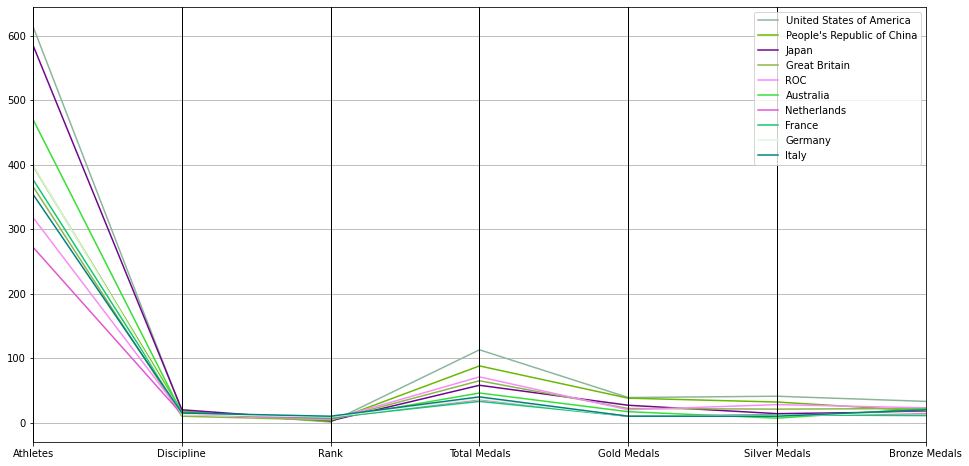

In [ ]:
df_10 = df.head(10).copy()
df_10 = df_10[['Country', 'Athletes', 'Discipline', 'Rank', 'Total Medals', 'Gold Medals', 'Silver Medals', 'Bronze Medals']]
plt.figure(figsize=(16,8))
pd.plotting.parallel_coordinates(df_10, 'Country')